# Geographic Manipulations Part II #
In this notebook I will go further into wrangling the data into form it needs to be for running corelations.

## Adding Car Accidents To Accident Clusters ##
First I will read in my bike clusters and my car accidents as dataframes. 

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely.wkt as wkt
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

Read in bike clusters and prepare it to have car accidents added.

In [16]:
cl_df = pd.read_csv('data/cleaned_data/bike_clusters.csv')

# convert shape strings back to shapes
cl_df['shape'] = cl_df['shape'].map(lambda a: wkt.loads(a))

#convert buffer strings back to shapes
cl_df['buffer'] = cl_df['buffer'].map(lambda a: wkt.loads(a))

#rename accident_ids to bike_acc_ids
cl_df = cl_df.rename(columns={'accident_ids':'bike_acc_ids'})

#add new empty column of car_acc_ids
cl_df['car_acc_ids'] = ''
cl_df.head()

,Unnamed: 0,shape,bike_acc_ids,buffer,car_acc_ids
0,0,"LINESTRING (231203.176793 900199.040998, 23116...","['B1001', 'B1042', 'B1497', 'B1550', 'B1612', ...","POLYGON ((231098.4669045935 900188.86552251, 2...",
1,1,POINT (233984.572264 897655.138169),['B1003'],"POLYGON ((234034.572264 897655.138169, 234034....",
2,2,"LINESTRING (239308.085183 903574.2767479999, 2...","['B1004', 'B2275']","POLYGON ((239356.3626262423 903561.2656575766,...",
3,3,POINT (236029.64835 899772.501906),['B1005'],"POLYGON ((236079.64835 899772.501906, 236079.4...",
4,4,POINT (230874.809746 892940.8337719999),['B1006'],"POLYGON ((230924.809746 892940.8337719999, 230...",


Read in car accidents.

In [5]:
car_df = pd.read_csv('data/cleaned_data/car_accidents_cleaned.csv')
car_df.head()

,Unnamed: 0,index,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Xkm,Start_Ykm,End_Xkm,End_Ykm
0,0,194279,A-194281,MapQuest,201.0,2,2016-11-30 17:18:00,2016-11-30 18:35:00,42.251457,-71.002701,...,False,False,Night,Night,Night,Day,241037.320696,889118.737133,NaN,NaN
1,1,194286,A-194288,MapQuest,201.0,3,2016-11-30 17:57:43,2016-11-30 19:12:25,42.298656,-71.047501,...,False,False,Night,Night,Night,Night,237312.630240,894340.699035,NaN,NaN
2,2,194332,A-194334,MapQuest,201.0,2,2016-12-01 05:13:34,2016-12-01 05:43:02,42.335854,-71.107498,...,True,False,Night,Night,Night,Night,232346.360202,898447.945054,NaN,NaN
3,3,194338,A-194340,MapQuest,201.0,3,2016-12-01 06:15:12,2016-12-01 06:44:56,42.330719,-71.060905,...,False,False,Night,Night,Day,Day,236189.025531,897896.294689,NaN,NaN
4,4,194397,A-194399,MapQuest,201.0,2,2016-12-01 07:59:19,2016-12-01 08:28:54,42.361366,-71.072342,...,False,False,Day,Day,Day,Day,235229.359109,901295.621937,NaN,NaN


Go through all the car accidents, add them to bike clusters if they are within the buffer, otherwise create new areas.

Since this is a fairly time-consuming manipulation, I outputted the count of cycles every 100 rows of the car accident database to make sure I hadn't crashed my computer.

In [17]:
count = 0
for car_i, car_r in car_df.iterrows():
    point = Point(car_r['Start_Xkm'], car_r['Start_Ykm'])
    found = False
    for i, cl in cl_df.iterrows():
        if cl['buffer'].contains(point):
            if (cl['car_acc_ids'] is None) or (cl['car_acc_ids'] == ''):
                cl_df.at[i, 'car_acc_ids'] = [car_r['ID']]
            else:
                cl_df.at[i, 'car_acc_ids'] = cl['car_acc_ids'] +[car_r['ID']]
            if (cl['shape'].geom_type == 'Point'):
                new_shape = LineString([cl['shape'], point])
            else:
                point_list = list(cl['shape'].coords)
                point_list.append(point)
                new_shape = LineString(point_list)
            new_buffer = new_shape.buffer(50)
            cl_df.at[i, 'shape'] = new_shape
            cl_df.at[i, 'buffer'] = new_buffer        
            found = True
            break
    if not found:
        cl_df = cl_df.append({'shape': point, 'car_acc_ids': [car_r['ID']], 'buffer': point.buffer(50)}, ignore_index=True)
    count += 1
    if (count % 100) == 0:
        print('count = ' + str(count))

cl_df.tail(10)

count = 100
count = 200
count = 300
count = 400
count = 500
count = 600
count = 700
count = 800
count = 900
count = 1000
count = 1100
count = 1200
count = 1300
count = 1400
count = 1500
count = 1600
count = 1700
count = 1800
count = 1900
count = 2000
count = 2100
count = 2200
count = 2300
count = 2400
count = 2500
count = 2600
count = 2700
count = 2800
count = 2900
count = 3000
count = 3100
count = 3200
count = 3300
count = 3400
count = 3500
count = 3600
count = 3700
count = 3800
count = 3900
count = 4000
count = 4100
count = 4200
count = 4300
count = 4400
count = 4500
count = 4600
count = 4700
count = 4800
count = 4900
count = 5000
count = 5100
count = 5200
count = 5300
count = 5400
count = 5500
count = 5600
count = 5700
count = 5800
count = 5900
count = 6000
count = 6100
count = 6200
count = 6300


,Unnamed: 0,shape,bike_acc_ids,buffer,car_acc_ids
2601,NaN,LINESTRING (231637.4509671116 900022.907424238...,NaN,"POLYGON ((231687.4509671116 900022.9074242386,...","[A-2821649, A-2821650]"
2602,NaN,POINT (230718.1374517187 897772.067600257),NaN,"POLYGON ((230768.1374517187 897772.067600257, ...",[A-2878003]
2603,NaN,POINT (237260.440073976 892066.0171111965),NaN,"POLYGON ((237310.440073976 892066.0171111965, ...",[A-2883305]
2604,NaN,POINT (231589.2055362123 900381.2491684691),NaN,"POLYGON ((231639.2055362123 900381.2491684691,...",[A-2888800]
2605,NaN,POINT (236823.8563864997 895574.7428300115),NaN,"POLYGON ((236873.8563864997 895574.7428300115,...",[A-2890021]
2606,NaN,POINT (226155.4803063761 900762.0242321348),NaN,"POLYGON ((226205.4803063761 900762.0242321348,...",[A-2902478]
2607,NaN,POINT (231900.5663141026 900197.0448120519),NaN,"POLYGON ((231950.5663141026 900197.0448120519,...",[A-2912412]
2608,NaN,POINT (237015.1566552405 903549.034613763),NaN,"POLYGON ((237065.1566552405 903549.034613763, ...",[A-2930452]
2609,NaN,LINESTRING (237020.9196992597 894788.352498651...,NaN,"POLYGON ((237070.9196992597 894788.3524986512,...","[A-2936813, A-2949463]"
2610,NaN,POINT (234400.0934403558 901775.1474937),NaN,"POLYGON ((234450.0934403558 901775.1474937, 23...",[A-2958601]


Output to file so hopefully I don't have to do that again.

In [18]:
# output to file
cl_df.to_csv(r'data/cleaned_data/acc_clusters.csv')

Spot check some shapes.

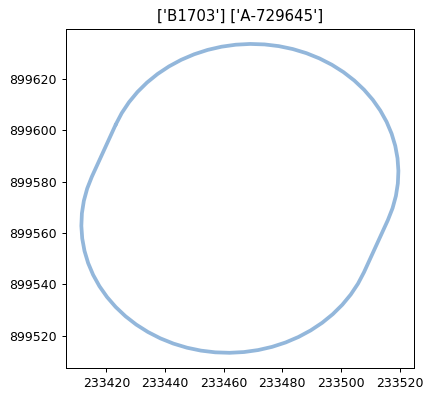

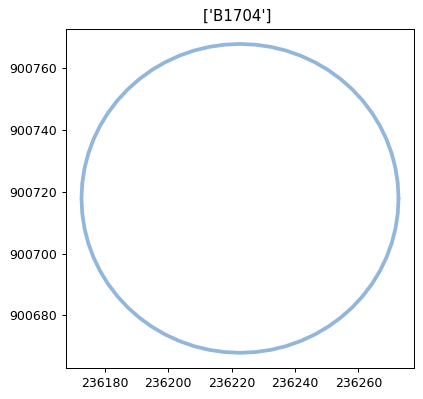

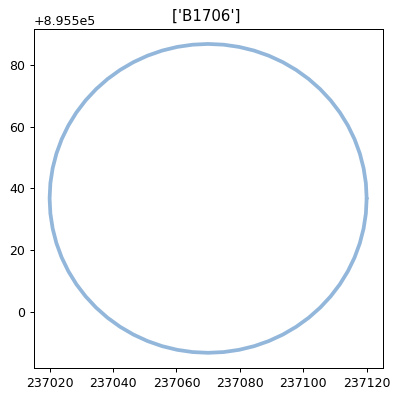

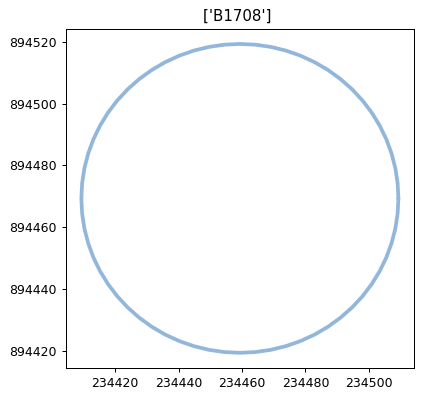

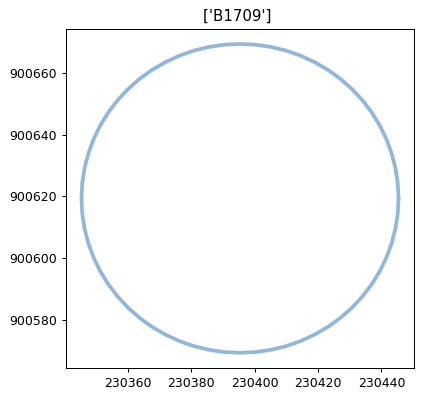

In [23]:
for i in range(500,505):
    x,y = cl_df.iloc[i]['buffer'].exterior.xy
    fig = plt.figure(i, figsize=(5,5), dpi=90)
    ax = fig.add_subplot(111)
    ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_title(str(cl_df.iloc[i]['bike_acc_ids'] + " " + str(cl_df.iloc[i]['car_acc_ids'])))

In Part III, I'm going to map the accident clusters, and determine if I need to create empty spaces with no accidents.